**Firstly we import all the require libraries**

In [13]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
        
execute_notebook("common.ipynb")

Wed May 23 11:16:46 2018


**In the gupta paper the first layer consist of 15 leaky integrate and fire nuerons.The input for those neurons were a constant current in case the pixel was "on" or a null current in case the pixel was "off".**
**If the neuron receives a constant current,it will fire around 3 times for a normal exposing of a character.**

**In this implementation, instead of simulating a leaky integrate and fire neurons, we directly use the class SpikeGeneratorGroup, to generate spikes at spicified times. 
The adavantage of this implementacion is that we have more control over the neurons  we are trying to train ('second layer').
The "dictionary" class is responsable for generating the array which contains the firing time for the first layer**

In [14]:
epochs = 100 
spikeMiliseconds = 100
spikeInterval = spikeMiliseconds * ms
spikeIntervalUnformatted = spikeMiliseconds * .001
dictionaryLongitude = 4
spikesPerChar=3
firstLayerSize = 15

dictionary = dictionary()
spiketimes = dictionary.spikeTimes(dictionaryLongitude, spikeInterval, spikesPerChar, epochs)
LIK = SpikeGeneratorGroup(firstLayerSize, spiketimes)
spikeMonitor = SpikeMonitor(LIK)

run(spikesPerChar * dictionaryLongitude * spikeInterval , report='text')

100% complete, 1s elapsed, approximately 0s remaining.


** We will now plot the images which will be used to train the network**

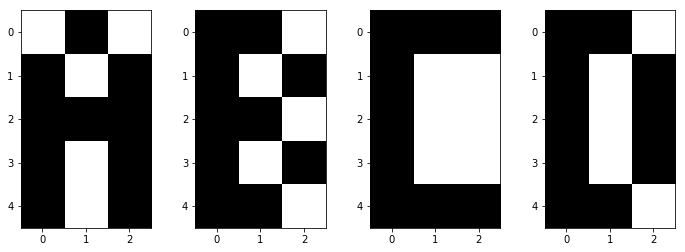

In [15]:
fig=plt.figure(figsize=(12,4))
for i in range(0,dictionaryLongitude):
    ax = fig.add_subplot(1,dictionaryLongitude,i+1)
    ax.imshow(dictionary.dictionary[i][1], interpolation="nearest", cmap = plt.cm.Greys_r)
    plt.xticks(np.arange(0,3, 1.0))

**Here we plot the spikes of the first layer, the first character is letter A, as you can see, the neuron 0,2,4,10,13 spikes at 100,200,300 miliseconds**

**Rembember you can zoon and pam clicking on the icons on the botton-left of the plot**


**A nicer looking version of the raster_plot for low number of neurons**

**As you can check, the black pixels of the images above correspondes to the neurons which fired on the scatter plot below.**

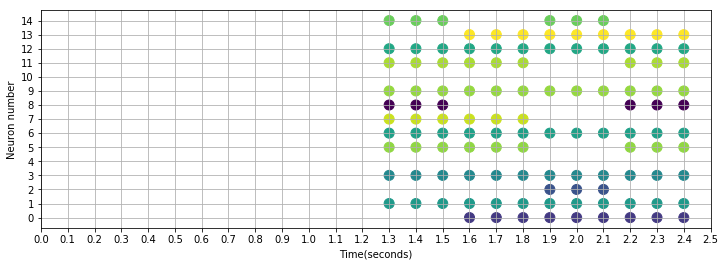

In [9]:
neuronArray = np.empty(0, dtype=int)
firetimeArray = np.empty(0, dtype=double)
neuronColor = np.random.rand(firstLayerSize)
colors = np.empty(0, dtype=float)

fig=plt.figure(figsize=(12,4))
for neuron in range(0,15):
    for fire in range(0,spikeMonitor.spiketimes[neuron].size):
       neuronArray = np.append(neuronArray, neuron)
       firetimeArray = np.append(firetimeArray,spikeMonitor.spiketimes[neuron][fire])
       colors = np.append(colors,neuronColor[neuron])

plt.scatter(firetimeArray,neuronArray, s=100, c=colors)
plt.xticks(np.arange(0,max(firetimeArray)+0.1, 0.1))
plt.yticks(np.arange(0,firstLayerSize, 1.0))
ylabel("Neuron number")
xlabel("Time(seconds)")
grid(True)

## Let's now show how the second layer should look like

**We will now, build an artificial raster plot to show how an idealy trained network should look like, make sure to zoom on it, to see that only one neuron fire when a given character is presented**

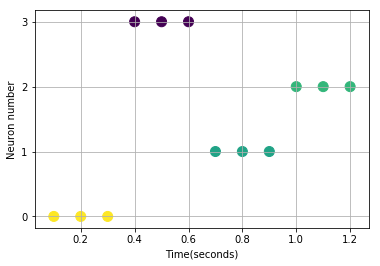

In [10]:
neuronArray = np.empty(0, dtype=int)
firetimeArray = np.empty(0, dtype=double)
neuronColor = np.random.rand(4)
colors = np.empty(0, dtype=float)

#Each neuron learn to represent a random character
neuronList=list(range(4))
np.random.shuffle(neuronList)


neuronIndex = 0
time = 0
for charNumber in range(0 ,dictionaryLongitude ):
    neuronIndex = (neuronIndex + 1)%4
    neuron = neuronList[neuronIndex]
    for charRepetetion in range(0,spikesPerChar):
         time = time + spikeInterval / ms
            
         neuronArray = np.append(neuronArray, neuron)
         firetimeArray = np.append(firetimeArray,time)
         colors = np.append(colors,neuronColor[neuron])

# fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'),figsize=(13,4))
fig, ax = plt.subplots()
points = plt.scatter(firetimeArray * ms,neuronArray, s=100, c=colors)
plt.yticks(np.arange(0,4, 1.0))
ylabel("Neuron number")
xlabel("Time(seconds)")
grid(True)

If you want to see a real simulation of the second layer click [here](simulation.ipynb)